In [1]:
import datajoint as dj

In [3]:
import sys
sys.path.append('c:\\Users\\liul.HHMI\\Desktop\\map-ephys\\pipeline') # go to parent dir
sys.path.append('c:\\Users\\liul.HHMI\\Desktop\\map-ephys\\scripts')
sys.path.append('c:\\Users\\liul.HHMI\\Desktop\\map-ephys\\development')
sys.path.append('c:\\Users\\liul.HHMI\\Desktop\\map-lab')

In [4]:
import ephys

Connecting daveliu@mesoscale-activity.datajoint.io:3306


In [ ]:
dj.ERD(ephys.experiment)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy as sp

In [ ]:
dj.ERD(ephys)-1

In [6]:
behaviorT=ephys.experiment.BehaviorTrial()

In [8]:
contraH=(behaviorT & 'subject_id = 399752' & 'session = 22' & 'outcome = "hit"' & 'trial_instruction = "right"' & 'early_lick = "no early"').fetch('trial')

In [9]:
ipsiH=(behaviorT & 'subject_id = 399752' & 'session = 22' & 'outcome = "hit"' & 'trial_instruction = "left"' & 'early_lick = "no early"').fetch('trial')

In [10]:
contraE=(behaviorT & 'subject_id = 399752' & 'session = 22' & 'outcome = "miss"' & 'trial_instruction = "right"' & 'early_lick = "no early"').fetch('trial')

In [11]:
ipsiE=(behaviorT & 'subject_id = 399752' & 'session = 22' & 'outcome = "miss"' & 'trial_instruction = "left"' & 'early_lick = "no early"').fetch('trial')

In [12]:
ephys1=ephys.Ephys()

In [13]:
spike=ephys1.Spike()

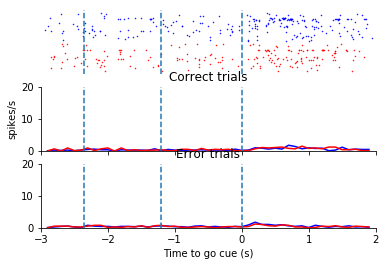

In [14]:
for x in range(130,131):
    unit1=(spike & {'unit': x} & {'subject_id': 399752} & 'session = 22').fetch('spike_time','trial')
    binSize=0.1;
    plt.figure()
    ax=plt.subplot(311)
    plt.plot(np.asarray(unit1[0][np.in1d(unit1[1],contraH)], dtype='float')-2.95,unit1[1][np.in1d(unit1[1],contraH)]+500,'b.',markersize=1)
    plt.plot(np.asarray(unit1[0][np.in1d(unit1[1],ipsiH)], dtype='float')-2.95,unit1[1][np.in1d(unit1[1],ipsiH)],'r.',markersize=1)
    ax.set_axis_off()
    ax.set_xlim([-3, 2])
    ax.axvline(0,0,1, ls='--')
    ax.axvline(-1.2,0,1, ls='--')
    ax.axvline(-2.35,0,1, ls='--')
    ax = plt.subplot(312)
    psth=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],contraH)], dtype='float')-2.95,bins=np.arange(-3,2,binSize))
    plt.plot(psth[1][1:],psth[0]/len(contraH)/binSize, 'b')
    psth=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],ipsiH)], dtype='float')-2.95,bins=np.arange(-3,2,binSize))
    plt.plot(psth[1][1:],psth[0]/len(ipsiH)/binSize, 'r')
    plt.ylabel('spikes/s')
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.set_xlim([-3, 2])
    ax.set_ylim([0, 20])
    ax.set_xticklabels([])
    ax.axvline(0,0,1, ls='--')
    ax.axvline(-1.2,0,1, ls='--')
    ax.axvline(-2.35,0,1, ls='--')
    plt.title('Correct trials')
    ax = plt.subplot(313)
    psth=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],contraE)], dtype='float')-2.95,bins=np.arange(-3,2,0.1))
    plt.plot(psth[1][1:],psth[0]/len(contraE)/binSize, 'b')
    psth=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],ipsiE)], dtype='float')-2.95,bins=np.arange(-3,2,0.1))
    plt.plot(psth[1][1:],psth[0]/len(ipsiE)/binSize, 'r')
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.set_xlim([-3, 2])
    ax.set_ylim([0, 20])
    ax.axvline(0,0,1, ls='--')
    ax.axvline(-1.2,0,1, ls='--')
    ax.axvline(-2.35,0,1, ls='--')
    plt.title('Error trials')
    plt.xlabel('Time to go cue (s)')

In [16]:
hfNeurons=[]
selectC=[]
selectI=[]
binSize=0.1
for x in range(0,400):
    unit1=(spike & {'unit': x} & {'animal': 399752} & 'session = 22').fetch('spike_time','trial') # find high firing neurons
    if len(unit1[0])/5/500>5:
        hfNeurons=np.append(hfNeurons, x)
        psthC=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],contraH)], dtype='float')-2.95,bins=np.arange(-3,2,binSize))
        psthI=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],ipsiH)], dtype='float')-2.95,bins=np.arange(-3,2,binSize)) 
        if len(unit1[0][np.in1d(unit1[1],contraH[0:400])]) > len(unit1[0][np.in1d(unit1[1],ipsiH[0:400])]):
            if len(selectC) == 0:
                selectC=(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))/max(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))
            elif len(selectC) != 0:
                selectC=np.vstack((selectC, (psthC[0]/len(contraH)-psthI[0]/len(ipsiH))/max(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))))
        elif len(unit1[0][np.in1d(unit1[1],contraH[0:400])]) < len(unit1[0][np.in1d(unit1[1],ipsiH[0:400])]):
            if len(selectI) == 0:
                selectI=(psthI[0]/len(ipsiH)-psthC[0]/len(contraH))/min(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))
            elif len(selectI) != 0:
                selectI=np.vstack((selectI, (psthI[0]/len(ipsiH)-psthC[0]/len(contraH))/min(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))))

In [22]:
selectC

array([[-0.23626374, -0.43406593, -0.38461538, ...,  0.43131868,
         0.82967033,  0.31043956],
       [ 0.01159794,  0.08118557,  0.11726804, ...,  0.34793814,
         0.80670103,  0.25257732],
       [-0.63366337, -0.34323432,  0.17821782, ...,  0.74917492,
         0.89768977,  0.71617162],
       ...,
       [ 0.37579618, -0.48407643, -0.15923567, ...,  1.        ,
         0.00636943,  0.12101911],
       [-0.12264151, -0.4245283 ,  0.16666667, ..., -0.09119497,
         0.53459119,  0.04402516],
       [ 0.47245763, -0.07415254,  0.81144068, ...,  0.54661017,
         0.48728814,  1.        ]])

In [17]:
len(selectC[1])

49

In [21]:
selectI

array([-0.13513514, -0.13963964, -0.10810811,  0.07882883,  0.04054054,
       -0.36936937, -0.51351351, -0.4481982 , -0.28378378,  0.03153153,
       -0.05855856,  0.1509009 , -0.18918919,  0.09459459, -0.5       ,
       -0.48198198, -0.23198198,  0.44144144, -0.21846847, -0.38063063,
        0.03378378, -0.23648649, -0.60585586, -0.29504505, -0.17342342,
       -1.        , -0.82432432, -0.13288288, -0.36261261, -0.13963964,
       -0.66666667, -0.72522523, -0.87612613, -0.5472973 , -0.59234234,
       -0.06306306, -0.00675676, -0.15315315, -0.19594595, -0.13738739,
       -0.3536036 , -0.30630631, -0.57882883, -0.32207207, -0.43693694,
       -0.42567568, -0.34009009, -0.18243243,  0.03153153])

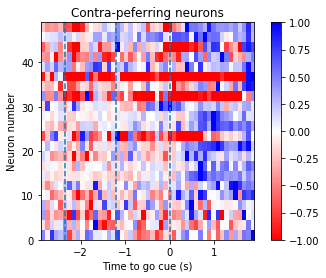

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(selectC[:][:],vmin=-1, vmax=1, extent=[psthC[1][1],psthC[1][-1],0, len(selectC[:][1])])
plt.colorbar()
plt.set_cmap('bwr_r')
ax.set_aspect(0.1)
plt.title('Contra-peferring neurons')
plt.ylabel('Neuron number')
plt.xlabel('Time to go cue (s)')
ax.axvline(0,0,1, ls='--')
ax.axvline(-1.2,0,1, ls='--')
ax.axvline(-2.35,0,1, ls='--')

TypeError: object of type 'numpy.float64' has no len()

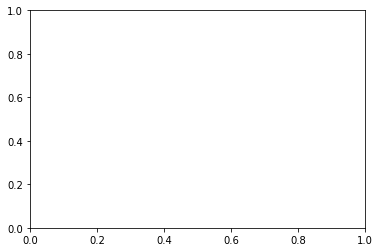

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(selectI[:][:],vmin=-1, vmax=1, extent=[psthI[1][1],psthI[1][-1],0, len(selectI[:][1])])
plt.colorbar()
plt.set_cmap('bwr_r')
ax.set_aspect(0.1)
plt.title('Ipsi-peferring neurons')
plt.ylabel('Neuron number')
plt.xlabel('Time (s)')
ax.axvline(0,0,1, ls='--')
ax.axvline(-1.2,0,1, ls='--')
ax.axvline(-2.35,0,1, ls='--')

In [23]:
sC=np.empty(len(hfNeurons))
sE=np.empty(len(hfNeurons))
for x in range(0,len(hfNeurons)): # choice related activity
    unit1=(spike & {'unit': hfNeurons[x]} & {'animal': 399752} & 'session = 22').fetch('spike_time','trial') # find high firing neurons
    spkC=np.asarray(unit1[0][np.in1d(unit1[1],contraH)], dtype='float')-2.95
    spkI=np.asarray(unit1[0][np.in1d(unit1[1],ipsiH)], dtype='float')-2.95
    spkCE=np.asarray(unit1[0][np.in1d(unit1[1],contraE)], dtype='float')-2.95
    spkIE=np.asarray(unit1[0][np.in1d(unit1[1],ipsiE)], dtype='float')-2.95
    sC[x]=(len(spkC[(spkC<2) & (spkC>0)])/len(contraH)-len(spkI[(spkI<2) & (spkI>0)])/len(ipsiH))/2
    sE[x]=(len(spkCE[(spkCE<2) & (spkCE>0)])/len(contraE)-len(spkIE[(spkIE<2) & (spkIE>0)])/len(ipsiE))/2
    

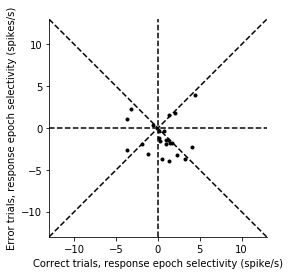

In [24]:
ax=plt.subplot(111)
plt.plot(sC,sE,'k.',[-13, 13], [-13, 13],'k--',[-13, 13], [13, -13],'k--')
plt.xlabel('Correct trials, response epoch selectivity (spike/s)')
plt.ylabel('Error trials, response epoch selectivity (spikes/s)')
plt.xlim(-13, 13)
plt.ylim(-13, 13)
plt.gca().set_aspect('equal', adjustable='box')
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.axvline(0,0,1, ls='--', color='k')
ax.axhline(0,0,1, ls='--', color='k')

In [25]:
np.corrcoef(sC, sE)

array([[ 1.        , -0.04304148],
       [-0.04304148,  1.        ]])

In [26]:
from scipy.stats import linregress
linregress(sC, sE)

LinregressResult(slope=-0.041352747005773204, intercept=-1.0799017941315543, rvalue=-0.04304148005481593, pvalue=0.8453943107527958, stderr=0.20946181714635093)

In [ ]:
hfNeurons=[]
selectC=[]
selectI=[]
binSize=0.1
for x in range(1,512):
    unit1=(spike & {'unit': x} & {'animal': 399752} & 'session = 22').fetch('spike_time','trial') # find high firing neurons
    if len(unit1[0])/5/500>4:
        hfNeurons=np.append(hfNeurons, x)
        psthC=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],contraH)], dtype='float')-2.95,bins=np.arange(-3,2,binSize))
        psthI=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],ipsiH)], dtype='float')-2.95,bins=np.arange(-3,2,binSize)) 
        if len(unit1[0][np.in1d(unit1[1],contraH[0:100])]) > len(unit1[0][np.in1d(unit1[1],ipsiH[0:100])]):
            if len(selectC) == 0:
                selectC=(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))/max(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))
            elif len(selectC) != 0:
                selectC=np.vstack((selectC, (psthC[0]/len(contraH)-psthI[0]/len(ipsiH))/max(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))))
        elif len(unit1[0][np.in1d(unit1[1],contraH[0:100])]) < len(unit1[0][np.in1d(unit1[1],ipsiH[0:100])]):
            if len(selectI) == 0:
                selectI=(psthI[0]/len(ipsiH)-psthC[0]/len(contraH))/min(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))
            elif len(selectI) != 0:
                selectI=np.vstack((selectI, (psthI[0]/len(ipsiH)-psthC[0]/len(contraH))/min(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))))# coding direction

In [ ]:
selectC

In [ ]:
# noise correlation

In [1]:
import h5py
import numpy as np


c:\users\liul.hhmi\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [12]:
#file="C:\\Users\liul.HHMI\Desktop\\tw5ap_imec3_opt3_jrc.mat"
file="C:\\Users\liul.HHMI\Desktop\\dl7_g0_t0.imec.ap_imec3_opt3_jrc.mat"
f = h5py.File(file,'r')

In [13]:
trWav_raw_clu = f['S_clu']['trWav_raw_clu']

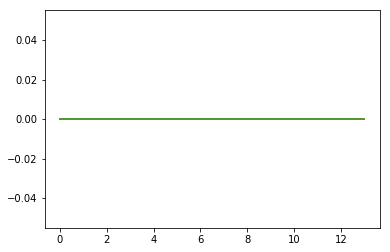

In [14]:
plt.plot(trWav_raw_clu[1][:])

In [ ]:
trWav_raw_clu[0]

In [ ]:
a= np.concatenate((trWav_raw_clu[0:1][:][:],trWav_raw_clu), axis=0)

In [ ]:
a[2][0]

In [ ]:
np.(1,4)

In [48]:
csNote_clu=f['S_clu']['csNote_clu'][0]

In [62]:
strs = ["multi" for x in range(len(csNote_clu))]
for iU in range(0, len(csNote_clu)):
    unitQ = f[csNote_clu[iU]]
    str1 = ''.join(chr(i) for i in unitQ[:])
    if str1 == 'single':
        strs[iU] = 'good'
    elif str1 =='multi':
        strs[iU] = 'ok'

In [63]:
strs

['good',
 'good',
 'good',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'good',
 'good',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'good',
 'good',
 'multi',
 'good',
 'multi',
 'multi',
 'good',
 'good',
 'good',
 'multi',
 'multi',
 'good',
 'multi',
 'good',
 'multi',
 'multi',
 'multi',
 'good',
 'multi',
 'good',
 'good',
 'good',
 'good',
 'good',
 'multi',
 'good',
 'multi',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'multi',
 'multi',
 'multi',
 'good',
 'multi',
 'good',
 'good',
 'good',
 'multi',
 'multi',
 'multi',
 'multi',
 'good',
 'multi',
 'good',
 'good',
 'multi',
 'multi',
 'multi',
 'multi',
 'good',
 'multi',
 'multi',
 'multi',
 'multi',
 'good',
 'good',
 'multi',
 'good',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 'multi',
 '

884